In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv('train.csv',index_col=0) 
data.head(11)


,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0


In [3]:
data.shape


(20800, 4)

In [4]:
print(data.columns)

Index(['title', 'author', 'text', 'label'], dtype='object')


In [5]:
import pandas as pd

# Assuming 'data' is a pandas DataFrame already loaded with your dataset

# List of columns to be removed
columns_to_remove = ['id', 'author', 'title']

# Use a loop to remove the columns safely
for column in columns_to_remove:
    if column in data.columns:
        data = data.drop(column, axis=1)
    else:
        print(f"No such column as '{column}' in DataFrame.")

# Display the first few rows of the modified DataFrame to confirm removal of columns
print(data.head())



No such column as 'id' in DataFrame.
                                                 text  label
id                                                          
0   House Dem Aide: We Didn’t Even See Comey’s Let...      1
1   Ever get the feeling your life circles the rou...      0
2   Why the Truth Might Get You Fired October 29, ...      1
3   Videos 15 Civilians Killed In Single US Airstr...      1
4   Print \nAn Iranian woman has been sentenced to...      1


In [6]:
data.isnull().sum()


text     39
label     0
dtype: int64

In [7]:
data.reset_index(inplace=True, drop=True)


In [8]:
# Shuffling 
data = data.sample(frac=1) 
data.reset_index(inplace=True) 
data.drop(["index"], axis=1, inplace=True) 
data = data.sample(frac=1, ignore_index=True)



In [9]:
import seaborn as sns

<Axes: xlabel='label', ylabel='count'>

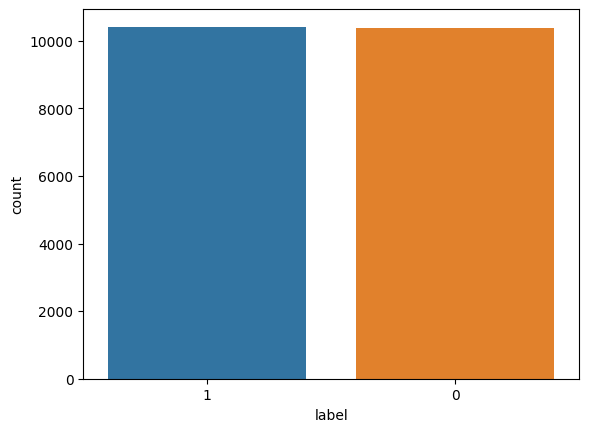

In [10]:
sns.countplot(data=data, 
			x='label', 
			order=data['label'].value_counts().index)


In [11]:
from tqdm import tqdm 
import re 
import nltk 
nltk.download('punkt') 
nltk.download('stopwords') 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
from nltk.stem.porter import PorterStemmer 
from wordcloud import WordCloud


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sinch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import pandas as pd
from tqdm import tqdm
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Assuming 'data' is a DataFrame and 'text' is one of its columns containing text data
data['text'] = data['text'].fillna('')  # Replace NaN values with an empty string

# Download NLTK stopwords if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text_data):
    preprocessed_text = []
    stop_words = set(stopwords.words('english'))
    
    for sentence in tqdm(text_data):
        sentence = re.sub(r'[^\w\s]', '', str(sentence))  # Remove punctuation
        words = word_tokenize(sentence.lower())  # Tokenize and convert to lowercase
        filtered_words = [word for word in words if word not in stop_words]
        preprocessed_text.append(' '.join(filtered_words))
    
    return preprocessed_text

preprocessed_review = preprocess_text(data['text'].values)
data['text'] = preprocessed_review


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sinch\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sinch\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
100%|██████████| 20800/20800 [00:55<00:00, 375.79it/s]


In [14]:
 import pandas as pd
 import re
 dara=pd.read_csv('train.csv')
 columns_to_remove = ['subject','date','title']

 for column in columns_to_remove:
     if column in data.columns:
         data = data.drop(column, axis=1)
     else:
         print(f"No such column as'{column}' in Dataframe.")

 def remove_punctuation(text):
     return re.sub(r'[^\w\s]','',text)

 data['text'] = data['text'].apply(remove_punctuation)

 def convert_to_lower(text):
     return text.lower()

 data['text'] = data['text'].apply(convert_to_lower)
 print(data['text'])


No such column as'subject' in Dataframe.
No such column as'date' in Dataframe.
No such column as'title' in Dataframe.
0        november 10th 2016 fort russ news politrussia ...
1        roger wilkins championed civil rights black am...
2        people parts south america africa treated rare...
3        press conference wednesday nasa announced park...
4        george michael english songwriter sold tens mi...
                               ...                        
20795    washington president trump seeming relish figh...
20796    twitter batchelorshow trump make russia crimea...
20797    jerusalem speaking breitbart news trip israel ...
20798    people profits ease halloween à la russe wests...
20799    federal appeals court new york thrown 655 5 mi...
Name: text, Length: 20800, dtype: object


In [15]:
print(data.head())

                                                text  label
0  november 10th 2016 fort russ news politrussia ...      1
1  roger wilkins championed civil rights black am...      0
2  people parts south america africa treated rare...      0
3  press conference wednesday nasa announced park...      0
4  george michael english songwriter sold tens mi...      0


In [16]:
from wordcloud import WordCloud

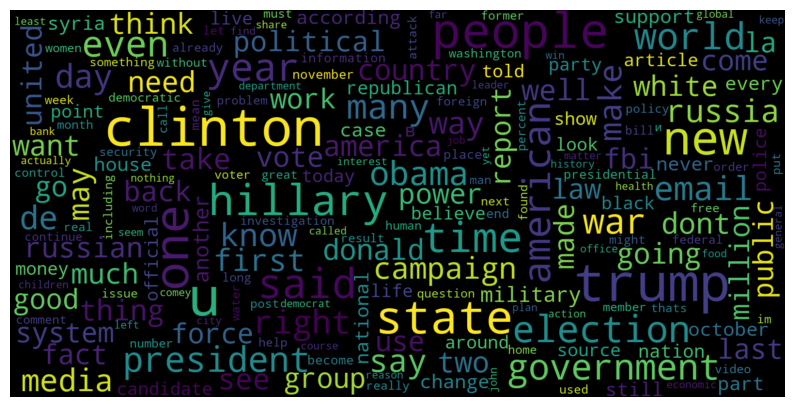

In [17]:

# Real 
consolidated = ' '.join( 
	word for word in data['text'][data['label'] == 1].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(10, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


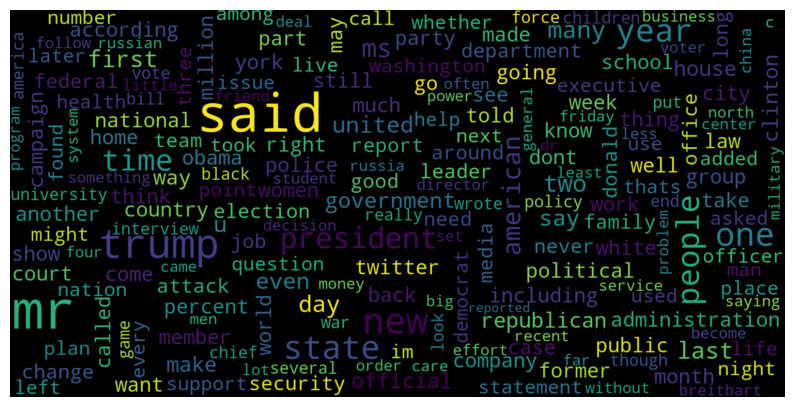

In [18]:
# Fake 
consolidated = ' '.join( 
	word for word in data['text'][data['label'] == 0].astype(str)) 
wordCloud = WordCloud(width=1600, 
					height=800, 
					random_state=21, 
					max_font_size=110, 
					collocations=False) 
plt.figure(figsize=(10, 10)) 
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear') 
plt.axis('off') 
plt.show() 


<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

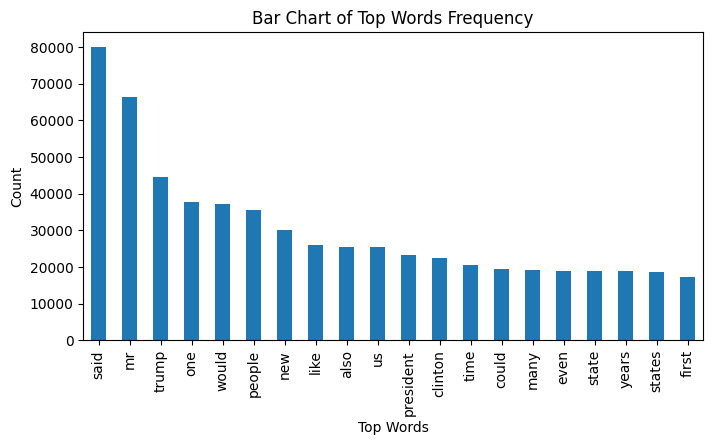

In [19]:
from sklearn.feature_extraction.text import CountVectorizer 
import pandas as pd

def get_top_n_words(corpus, n=None): 
    vec = CountVectorizer().fit(corpus.fillna('')) # Fill NaN values with empty string
    bag_of_words = vec.transform(corpus.fillna('')) 
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) 
                for word, idx in vec.vocabulary_.items()] 
    words_freq = sorted(words_freq, key=lambda x: x[1], 
                        reverse=True) 
    return words_freq[:n] 

common_words = get_top_n_words(data['text'], 20) 
df1 = pd.DataFrame(common_words, columns=['Review', 'count']) 

df1.groupby('Review').sum()['count'].sort_values(ascending=False).plot( 
    kind='bar', 
    figsize=(8, 4), 
    xlabel="Top Words", 
    ylabel="Count", 
    title="Bar Chart of Top Words Frequency"
)


In [20]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression 

x_train, x_test, y_train, y_test = train_test_split(data['text'], 
													data['label'], 
													test_size=0.25)


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer 
import pandas as pd

# Assuming x_train and x_test are your training and testing data respectively

# Fill NaN values in x_train and x_test with empty strings
x_train.fillna('', inplace=True)
x_test.fillna('', inplace=True)

vectorization = TfidfVectorizer() 
x_train = vectorization.fit_transform(x_train) 
x_test = vectorization.transform(x_test)


In [22]:
print(x_train)


  (0, 137465)	0.009948764689048678
  (0, 113506)	0.014969929690687512
  (0, 14686)	0.012973812485440444
  (0, 146128)	0.009241234717996831
  (0, 16051)	0.009821556873153107
  (0, 91208)	0.04691576143013903
  (0, 33607)	0.012706034690961729
  (0, 113000)	0.03039117231381007
  (0, 121587)	0.03594166580267529
  (0, 51886)	0.010827619315247372
  (0, 73976)	0.012840787771286923
  (0, 156640)	0.017087224530047084
  (0, 55896)	0.026895330256429196
  (0, 35892)	0.019168912767979395
  (0, 127994)	0.024037819060113413
  (0, 16317)	0.019737348237848073
  (0, 29233)	0.009579535294572682
  (0, 117930)	0.010049913405564138
  (0, 40831)	0.01881234267855047
  (0, 71359)	0.020788886859988243
  (0, 6970)	0.01657816247888895
  (0, 24589)	0.01335545308402308
  (0, 117786)	0.00930457174969222
  (0, 113308)	0.08448319317991393
  (0, 155020)	0.017769945910886577
  :	:
  (15599, 38159)	0.029434208725731992
  (15599, 18585)	0.011416055533017513
  (15599, 66864)	0.023846578065536965
  (15599, 38282)	0.032613172

In [23]:
print(x_test)

  (0, 157278)	0.04742081863512801
  (0, 157068)	0.05448736782729393
  (0, 156867)	0.04448443036081673
  (0, 156661)	0.08116895411375517
  (0, 156305)	0.05944460809710218
  (0, 155970)	0.11383318712424968
  (0, 155544)	0.045734367639079516
  (0, 155417)	0.03384206512806573
  (0, 154943)	0.03923654352926491
  (0, 152429)	0.12371290825467579
  (0, 152410)	0.0887564006544158
  (0, 149818)	0.053431771064064694
  (0, 146128)	0.09591717192253563
  (0, 143979)	0.17213228726513255
  (0, 143933)	0.030907237461028893
  (0, 143354)	0.023984251296117837
  (0, 142632)	0.12174412253731906
  (0, 142065)	0.035281471014730365
  (0, 141242)	0.04322212465427406
  (0, 140886)	0.04168335661220861
  (0, 138706)	0.061122152676862274
  (0, 138623)	0.04246421807375587
  (0, 138540)	0.06188793684312631
  (0, 137057)	0.045480508152642755
  (0, 136914)	0.06220688197854367
  :	:
  (5199, 54122)	0.07092306630735366
  (5199, 50457)	0.18169917631057178
  (5199, 50327)	0.07229639205837787
  (5199, 46914)	0.095673919034

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Assuming x_train, x_test, y_train, and y_test are already defined and split properly

# Initialize Logistic Regression model with random_state
model = LogisticRegression(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Testing the model
train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, model.predict(x_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9749358974358975
Testing Accuracy: 0.9519230769230769


In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Instantiate and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Test the model and generate classification report
from sklearn.metrics import accuracy_score

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Testing Accuracy:", accuracy_score(y_test, test_predictions))

print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))

print("Classification Report for Testing Data:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.9749358974358975
Testing Accuracy: 0.9519230769230769
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      7784
           1       0.97      0.98      0.98      7816

    accuracy                           0.97     15600
   macro avg       0.98      0.97      0.97     15600
weighted avg       0.98      0.97      0.97     15600

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      2603
           1       0.95      0.96      0.95      2597

    accuracy                           0.95      5200
   macro avg       0.95      0.95      0.95      5200
weighted avg       0.95      0.95      0.95      5200



In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, x_test, y_train, and y_test are already defined and split properly

# Initialize Decision Tree Classifier with random_state
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Testing the model
train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, model.predict(x_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9999358974358974
Testing Accuracy: 0.8911538461538462


In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Instantiate and train the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Test the model and generate classification report
from sklearn.metrics import accuracy_score

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Testing Accuracy:", accuracy_score(y_test, test_predictions))

print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))

print("Classification Report for Testing Data:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.9999358974358974
Testing Accuracy: 0.8875
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7784
           1       1.00      1.00      1.00      7816

    accuracy                           1.00     15600
   macro avg       1.00      1.00      1.00     15600
weighted avg       1.00      1.00      1.00     15600

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      2603
           1       0.89      0.89      0.89      2597

    accuracy                           0.89      5200
   macro avg       0.89      0.89      0.89      5200
weighted avg       0.89      0.89      0.89      5200



In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, x_test, y_train, and y_test are already defined and split properly

# Initialize Random Forest Classifier with random_state
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(x_train, y_train)

# Testing the model
train_accuracy = accuracy_score(y_train, model.predict(x_train))
test_accuracy = accuracy_score(y_test, model.predict(x_test))

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")


Training Accuracy: 0.9999358974358974
Testing Accuracy: 0.9205769230769231


In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Instantiate and train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Test the model and generate classification report
from sklearn.metrics import accuracy_score

train_predictions = model.predict(x_train)
test_predictions = model.predict(x_test)

print("Training Accuracy:", accuracy_score(y_train, train_predictions))
print("Testing Accuracy:", accuracy_score(y_test, test_predictions))

print("Classification Report for Training Data:")
print(classification_report(y_train, train_predictions))

print("Classification Report for Testing Data:")
print(classification_report(y_test, test_predictions))


Training Accuracy: 0.9999358974358974
Testing Accuracy: 0.9192307692307692
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7784
           1       1.00      1.00      1.00      7816

    accuracy                           1.00     15600
   macro avg       1.00      1.00      1.00     15600
weighted avg       1.00      1.00      1.00     15600

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      2603
           1       0.95      0.89      0.92      2597

    accuracy                           0.92      5200
   macro avg       0.92      0.92      0.92      5200
weighted avg       0.92      0.92      0.92      5200



In [44]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

nb_classifier = MultinomialNB()

nb_classifier.fit(x_train, y_train)

y_train_pred = nb_classifier.predict(x_train)
y_test_pred = nb_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8872435897435897
Testing Accuracy: 0.8367307692307693


In [45]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Instantiate and train the model
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train, y_train)

# Test the model and generate classification report
from sklearn.metrics import accuracy_score

y_train_pred = nb_classifier.predict(x_train)
y_test_pred = nb_classifier.predict(x_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.8872435897435897
Testing Accuracy: 0.8367307692307693
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.82      1.00      0.90      7784
           1       1.00      0.78      0.87      7816

    accuracy                           0.89     15600
   macro avg       0.91      0.89      0.89     15600
weighted avg       0.91      0.89      0.89     15600

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.76      1.00      0.86      2603
           1       0.99      0.68      0.81      2597

    accuracy                           0.84      5200
   macro avg       0.87      0.84      0.83      5200
weighted avg       0.87      0.84      0.83      5200



In [46]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score


svm_classifier = SVC(kernel='linear', random_state=42) 

svm_classifier.fit(x_train, y_train)

y_train_pred = svm_classifier.predict(x_train)
y_test_pred = svm_classifier.predict(x_test) 

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.9957051282051282
Testing Accuracy: 0.9628846153846153


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svm_classifier = SVC(kernel='linear', random_state=42) 

svm_classifier.fit(x_train, y_train)

y_train_pred = svm_classifier.predict(x_train)
y_test_pred = svm_classifier.predict(x_test) 

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))

print("Classification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))


Training Accuracy: 0.9957051282051282
Testing Accuracy: 0.9628846153846153
Classification Report for Training Data:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      7784
           1       1.00      1.00      1.00      7816

    accuracy                           1.00     15600
   macro avg       1.00      1.00      1.00     15600
weighted avg       1.00      1.00      1.00     15600

Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2603
           1       0.96      0.97      0.96      2597

    accuracy                           0.96      5200
   macro avg       0.96      0.96      0.96      5200
weighted avg       0.96      0.96      0.96      5200



Train Accuracy: 0.9749358974358975
Test Accuracy: 0.9519230769230769


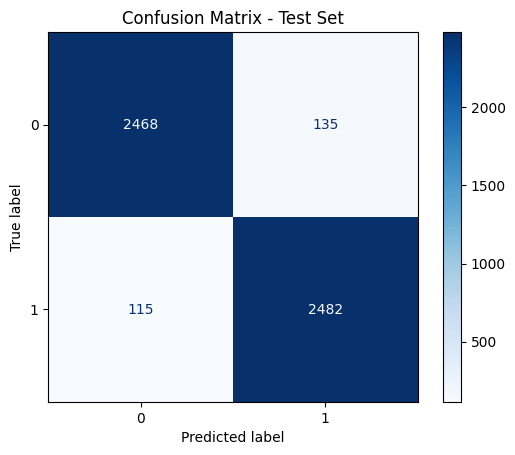

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Instantiate and train the model
model = LogisticRegression()
model.fit(x_train, y_train)

# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, test_preds)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()


Train Accuracy: 0.9999358974358974
Test Accuracy: 0.8919230769230769


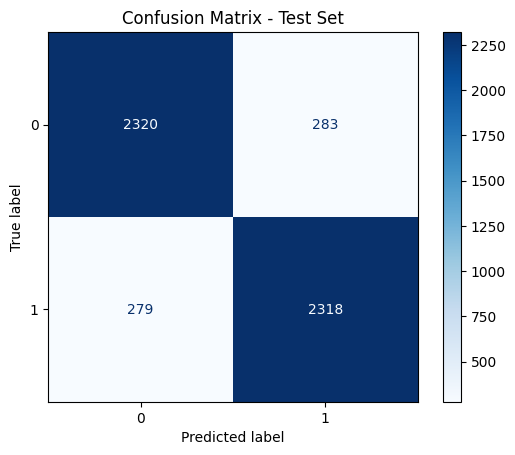

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Instantiate and train the model
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, test_preds)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()


Train Accuracy: 0.9999358974358974
Test Accuracy: 0.9148076923076923


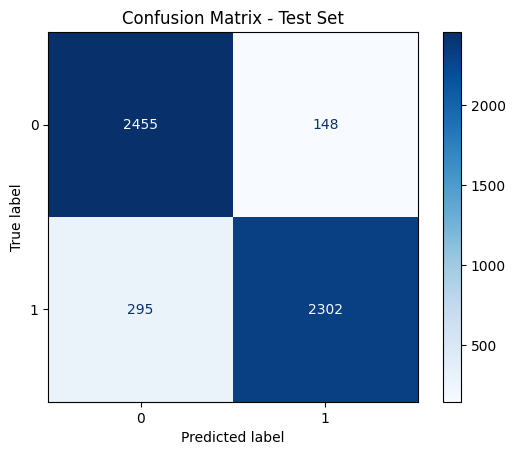

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Instantiate and train the model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, test_preds)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()


Train Accuracy: 0.8872435897435897
Test Accuracy: 0.8367307692307693


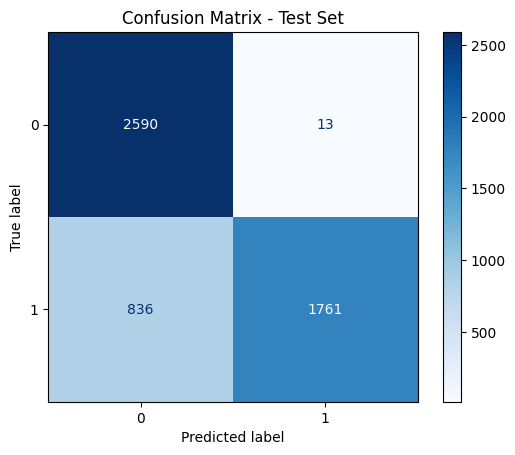

In [51]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Instantiate and train the model
model = MultinomialNB()
model.fit(x_train, y_train)

# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, test_preds)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()


Train Accuracy: 0.9989743589743589
Test Accuracy: 0.9634615384615385


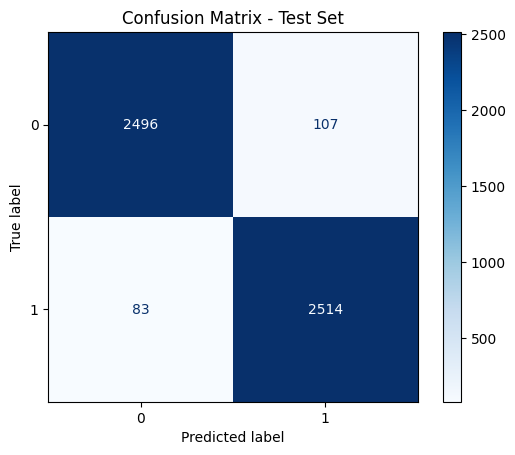

In [52]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt


# Instantiate and train the model
model = SVC()
model.fit(x_train, y_train)

# Predict on training and test sets
train_preds = model.predict(x_train)
test_preds = model.predict(x_test)

# Compute accuracy scores
train_accuracy = accuracy_score(y_train, train_preds)
test_accuracy = accuracy_score(y_test, test_preds)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")

# Compute confusion matrix for test set
cm = confusion_matrix(y_test, test_preds)

# Display confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Test Set')
plt.show()
